# Does dorm matter for well-being?

A: Probably not.

We fit a range of models to predict student's t2 (fall) well-being (measured in week 4 of the semester). Overall, their reported life satisfaction at t1 (measured in week 0, before the semester began) explained most of the variance in t2 life satisfaction (approx 55%), with trace amounts of additional variance explainable by additional variables (approx 3% more). The few variables that remained significant contributors to the model, above and beyond t1 life satisfaction, were: stress at t1, loneliness at t1, number of network nominations (in and out) at t2, and average family income of the person's network nominations. All were in the intuitive directions but very small in size.

Mixed-effects models showed that *none* of the residual variance in life satisfaction could be attributed to membership in particular dorms.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Drop-people-who-made-no-network-nominations" data-toc-modified-id="Drop-people-who-made-no-network-nominations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Drop people who made no network nominations</a></span></li><li><span><a href="#Drop-the-rows-with-missing-values-(~20%)" data-toc-modified-id="Drop-the-rows-with-missing-values-(~20%)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Drop the rows with missing values (~20%)</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Base-models---predict-well-being-at-t1-from-well-being-at-t1" data-toc-modified-id="Base-models---predict-well-being-at-t1-from-well-being-at-t1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Base models - predict well-being at t1 from well-being at t1</a></span><ul class="toc-item"><li><span><a href="#Life-satisfaction" data-toc-modified-id="Life-satisfaction-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Life satisfaction</a></span></li><li><span><a href="#Loneliness" data-toc-modified-id="Loneliness-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Loneliness</a></span></li><li><span><a href="#Stress" data-toc-modified-id="Stress-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Stress</a></span></li></ul></li><li><span><a href="#Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1" data-toc-modified-id="Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fixed-effects models: predict WB at t2 from WB and other personal factors at t1</a></span><ul class="toc-item"><li><span><a href="#From-here-on,-we'll-just-look-at-life-satisfaction" data-toc-modified-id="From-here-on,-we'll-just-look-at-life-satisfaction-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>From here on, we'll just look at life satisfaction</a></span></li></ul></li><li><span><a href="#Covariates-seem-to-matter-very-little---lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures" data-toc-modified-id="Covariates-seem-to-matter-very-little---lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Covariates seem to matter very little - lets reduce our fixed effects model to only wellbeing and in/out degree measures</a></span></li><li><span><a href="#Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)" data-toc-modified-id="Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)</a></span></li></ul></li><li><span><a href="#Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership" data-toc-modified-id="Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add random effect for dorm, see if significant variance is attributable to dorm membership</a></span><ul class="toc-item"><li><span><a href="#Try-again,-with-some-dorm-level-covariates" data-toc-modified-id="Try-again,-with-some-dorm-level-covariates-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Try again, with some dorm-level covariates</a></span></li></ul></li><li><span><a href="#Add-fixed-effects-for-network-(traits-of-people-connected-to-the-individual-via-nominations)" data-toc-modified-id="Add-fixed-effects-for-network-(traits-of-people-connected-to-the-individual-via-nominations)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Add fixed effects for network (traits of people connected to the individual via nominations)</a></span></li></ul></div>

## Libraries

In [1]:
library(car)
library(tidyverse)
library(mice)
library(nlme)
library(lme4)
library(lmerTest)

Loading required package: carData

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()

Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘mice’


The following object is masked from ‘package:tidyr’:

    complete


The following objects are masked from ‘package:base’:

    cbind, rbind



Attaching package: ‘nlme’


The following object is mask

In [2]:
df = read.csv('../data/2019–2020/postprocessed/df_full_train.csv', na.strings=c(""," "))
dim(df)
head(df)

[1] 560  57

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,⋯,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,⋯,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,⋯,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,⋯,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,⋯,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,⋯,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,⋯,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


In [3]:
str(df)

'data.frame':	560 obs. of  57 variables:
 $ PID                         : int  1001 1047 1078 1097 1105 1110 1128 1132 1134 1162 ...
 $ gender                      : Factor w/ 3 levels "female","male",..: 2 1 1 2 1 1 1 1 2 1 ...
 $ race                        : Factor w/ 6 levels "black","east_asian",..: 5 4 2 2 6 6 6 NA 3 2 ...
 $ dorm                        : Factor w/ 21 levels "Alondra","Arroyo",..: 16 19 11 15 10 10 7 15 2 3 ...
 $ life_satisfaction_t1        : num  4.83 5.33 5.5 6 6.67 ...
 $ empathy                     : num  6.38 6.5 6.25 5 5.75 ...
 $ loneliness_t1               : num  1.33 2 1.33 2 2 ...
 $ stress_t1                   : num  2.5 2.5 2 2 2 2 1.5 2 1.5 1 ...
 $ BFI_E                       : num  6.5 5.5 4.5 3 4.5 6.5 5 7 5.5 3.5 ...
 $ BFI_A                       : num  6 6.5 6.5 4 5 5 5 5 5 6.5 ...
 $ BFI_O                       : num  6.5 6.5 6.5 4.5 4.5 4.5 5.5 5.5 6 7 ...
 $ BFI_N                       : num  3.5 3 1.5 1.5 2 2 2 2.5 1.5 3 ...
 $ BFI_C      

## Drop people who made no network nominations

In [4]:
print(dim(df))
df = df[df$edges_out != 0,]
print(dim(df))

[1] 560  57
[1] 542  57


## Drop the rows with missing values (~20%)

,PID,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,⋯,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,race,
436,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
49,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
7,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,1,14
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,15
12,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,2
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,16
13,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,1,15
3,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,16
9,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


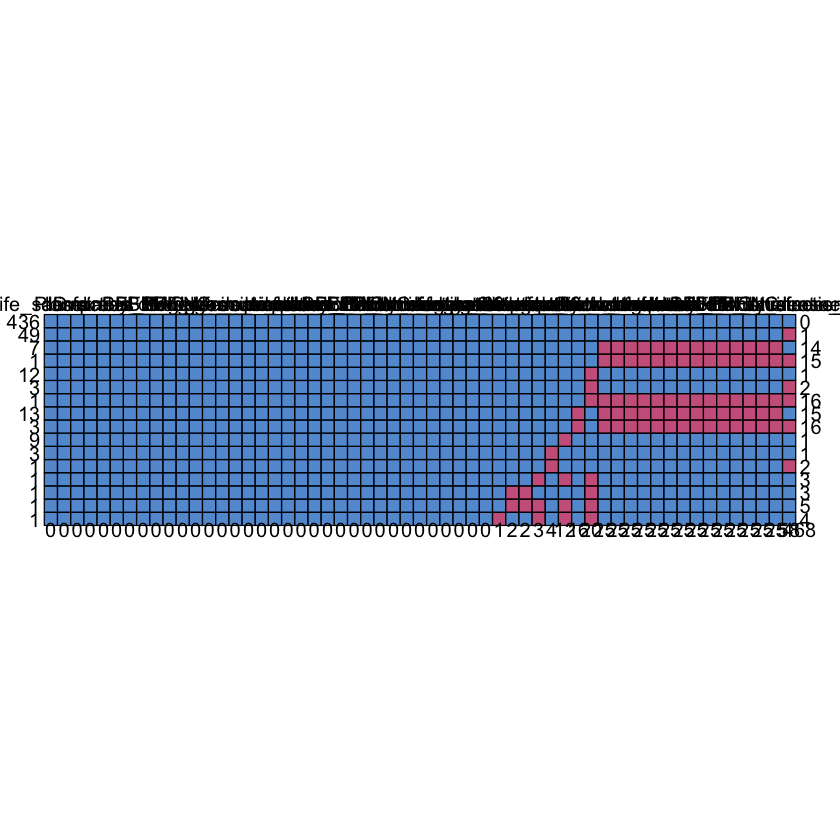

In [5]:
md.pattern(df)

In [6]:
# imputed <- mice(df, m=1)
# df = complete(imputed)
# sum(is.na(df))

In [7]:
dim(df)
df = df[complete.cases(df), ]
dim(df)

[1] 542  57

[1] 436  57

## Model

In [8]:
head(df)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,⋯,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,⋯,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,⋯,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,⋯,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,⋯,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,⋯,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,⋯,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


### Base models - predict well-being at t1 from well-being at t1

#### Life satisfaction

In [9]:
base_model_ls_only = lm(life_satisfaction_t2 ~ life_satisfaction_t1, df)
summary(base_model_ls_only)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9970 -0.4603  0.0472  0.5340  3.4046 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.9597     0.1744   5.504 6.35e-08 ***
life_satisfaction_t1   0.7814     0.0338  23.117  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8132 on 434 degrees of freedom
Multiple R-squared:  0.5518,	Adjusted R-squared:  0.5508 
F-statistic: 534.4 on 1 and 434 DF,  p-value: < 2.2e-16


In [10]:
base_model_ls <- lm(life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + stress_t1, df)
summary(base_model_ls)
Anova(base_model_ls)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + 
    stress_t1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0959 -0.4711  0.0389  0.5279  3.2731 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.01340    0.36335   5.541 5.23e-08 ***
life_satisfaction_t1  0.71422    0.03965  18.013  < 2e-16 ***
loneliness_t1        -0.13125    0.08351  -1.572   0.1168    
stress_t1            -0.23011    0.07862  -2.927   0.0036 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8041 on 432 degrees of freedom
Multiple R-squared:  0.5638,	Adjusted R-squared:  0.5608 
F-statistic: 186.1 on 3 and 432 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
life_satisfaction_t1,209.780501,1,324.464361,1.631603e-54
loneliness_t1,1.596912,1,2.469919,1.167760e-01
stress_t1,5.539164,1,8.567343,3.603179e-03
Residuals,279.307028,432,NA,NA


In [11]:
anova(base_model_ls_only, base_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,434,286.9732,NA,NA,NA,NA
2,432,279.3070,2,7.66622,5.928614,0.002883616


In [12]:
r1 = summary(base_model_ls_only)$adj.r.squared
r2 = summary(base_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.550813667293909"
[1] "After: 0.560789243774622"
[1] "Partial r² (adjusted): 0.022208103306741"


#### Loneliness

In [13]:
base_model_loneliness_only = lm(loneliness_t2 ~ loneliness_t1, df)
summary(base_model_loneliness_only)


Call:
lm(formula = loneliness_t2 ~ loneliness_t1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20538 -0.34649 -0.01316  0.32018  1.56351 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.85982    0.08688   9.897   <2e-16 ***
loneliness_t1  0.57667    0.04580  12.591   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5 on 434 degrees of freedom
Multiple R-squared:  0.2676,	Adjusted R-squared:  0.2659 
F-statistic: 158.5 on 1 and 434 DF,  p-value: < 2.2e-16


In [14]:
base_model_loneliness <- lm(loneliness_t2 ~ loneliness_t1 + life_satisfaction_t1 + stress_t1, df)
summary(base_model_loneliness)
Anova(base_model_loneliness)


Call:
lm(formula = loneliness_t2 ~ loneliness_t1 + life_satisfaction_t1 + 
    stress_t1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15248 -0.36180 -0.02261  0.32652  1.55973 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.84602    0.22302   3.793  0.00017 ***
loneliness_t1         0.51108    0.05126   9.970  < 2e-16 ***
life_satisfaction_t1 -0.03088    0.02434  -1.269  0.20519    
stress_t1             0.13937    0.04825   2.888  0.00407 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4935 on 432 degrees of freedom
Multiple R-squared:  0.2896,	Adjusted R-squared:  0.2847 
F-statistic: 58.71 on 3 and 432 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
loneliness_t1,24.2129248,1,99.405486,3.282277e-21
life_satisfaction_t1,0.3921348,1,1.609899,2.051893e-01
stress_t1,2.0319451,1,8.342094,4.068405e-03
Residuals,105.2254150,432,NA,NA


In [15]:
anova(base_model_loneliness_only, base_model_loneliness)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,434,108.4938,NA,NA,NA,NA
2,432,105.2254,2,3.268432,6.709228,0.001350692


In [16]:
r1 = summary(base_model_loneliness_only)$adj.r.squared
r2 = summary(base_model_loneliness)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.265871366362015"
[1] "After: 0.284691007919898"
[1] "Partial r² (adjusted): 0.0256353460355068"


#### Stress

In [17]:
base_model_stress_only = lm(stress_t2 ~ stress_t1, df)
summary(base_model_stress_only)


Call:
lm(formula = stress_t2 ~ stress_t1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32725 -0.32725 -0.07677  0.42227  1.42420 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07483    0.09899   10.86   <2e-16 ***
stress_t1    0.50097    0.04630   10.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5121 on 434 degrees of freedom
Multiple R-squared:  0.2124,	Adjusted R-squared:  0.2106 
F-statistic: 117.1 on 1 and 434 DF,  p-value: < 2.2e-16


In [18]:
base_model_stress <- lm(stress_t2 ~ stress_t1 + life_satisfaction_t1 + loneliness_t1, df)
summary(base_model_stress)
Anova(base_model_stress)


Call:
lm(formula = stress_t2 ~ stress_t1 + life_satisfaction_t1 + loneliness_t1, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22452 -0.34251 -0.06236  0.38385  1.32401 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.37516    0.22988   5.982 4.62e-09 ***
stress_t1             0.44843    0.04974   9.016  < 2e-16 ***
life_satisfaction_t1 -0.05287    0.02509  -2.108   0.0356 *  
loneliness_t1         0.04076    0.05284   0.771   0.4409    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5087 on 432 degrees of freedom
Multiple R-squared:  0.2263,	Adjusted R-squared:  0.2209 
F-statistic: 42.12 on 3 and 432 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
stress_t1,21.0352173,1,81.2843743,6.398954e-18
life_satisfaction_t1,1.1496159,1,4.4423506,3.563353e-02
loneliness_t1,0.1539969,1,0.5950755,4.408849e-01
Residuals,111.7953353,432,NA,NA


In [19]:
anova(base_model_stress_only, base_model_stress)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,434,113.8009,NA,NA,NA,NA
2,432,111.7953,2,2.005583,3.874991,0.0214798


In [20]:
r1 = summary(base_model_stress_only)$adj.r.squared
r2 = summary(base_model_stress)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.210598174494384"
[1] "After: 0.220920052326606"
[1] "Partial r² (adjusted): 0.0130755687391667"


### Fixed-effects models: predict WB at t2 from WB and other personal factors at t1

#### From here on, we'll just look at life satisfaction

In [21]:
fixed_params = "
life_satisfaction_t1 + loneliness_t1 + stress_t1 +
edges_in + edges_out +
C(gender) + C(race) + empathy +
BFI_E + BFI_O + BFI_C + BFI_A + BFI_N +
intl_student + parent_education_highest + log10(family_income)"

make_model = function(dv) {
    model = lm(as.formula(paste(dv, '~', fixed_params)), df)
}

In [22]:
fixed_model_ls = make_model("life_satisfaction_t2")
summary(fixed_model_ls)


Call:
lm(formula = as.formula(paste(dv, "~", fixed_params)), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.66626 -0.45237  0.05788  0.48735  3.03635 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 0.6523883  0.8253581   0.790
life_satisfaction_t1                        0.6738174  0.0434915  15.493
loneliness_t1                              -0.1211143  0.0897296  -1.350
stress_t1                                  -0.1958093  0.0942955  -2.077
edges_in                                    0.0334477  0.0149433   2.238
edges_out                                   0.0185924  0.0095494   1.947
C(gender)male                              -0.0607282  0.0866528  -0.701
C(gender)other                              0.2099445  0.5870844   0.358
C(race)east_asian                           0.1859674  0.1397825   1.330
C(race)hispanic                             0.2145496  0.1559815   1.375
C(rac

In [23]:
anova(base_model_ls, fixed_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,432,279.307,NA,NA,NA,NA
2,410,259.421,22,19.88599,1.428575,0.09585346


In [24]:
r1 = summary(base_model_ls)$adj.r.squared
r2 = summary(fixed_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.560789243774622"
[1] "After: 0.570170526066295"
[1] "Partial r² (adjusted): 0.0213594092555849"


### Covariates seem to matter very little - lets reduce our fixed effects model to only wellbeing and in/out degree measures

In [25]:
fixed_model_ls_inout = lm(life_satisfaction_t2 ~ life_satisfaction_t1 +
                          loneliness_t1 + stress_t1 + edges_in + edges_out,
                          df)
summary(fixed_model_ls_inout)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + 
    stress_t1 + edges_in + edges_out, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.01032 -0.45451  0.02202  0.49780  3.13413 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.674736   0.372064   4.501 8.71e-06 ***
life_satisfaction_t1  0.710248   0.039289  18.078  < 2e-16 ***
loneliness_t1        -0.114657   0.082955  -1.382  0.16764    
stress_t1            -0.220210   0.077889  -2.827  0.00491 ** 
edges_in              0.029149   0.014033   2.077  0.03837 *  
edges_out             0.019735   0.009432   2.092  0.03698 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7948 on 430 degrees of freedom
Multiple R-squared:  0.5758,	Adjusted R-squared:  0.5709 
F-statistic: 116.8 on 5 and 430 DF,  p-value: < 2.2e-16


In [26]:
anova(base_model_ls, fixed_model_ls_inout)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,432,279.3070,NA,NA,NA,NA
2,430,271.6045,2,7.702512,6.097248,0.002448226


In [27]:
r1 = summary(base_model_ls)$adj.r.squared
r2 = summary(fixed_model_ls_inout)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.560789243774622"
[1] "After: 0.57091495123464"
[1] "Partial r² (adjusted): 0.0230543248690874"


### Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)

In [28]:
df$residuals = fixed_model_ls$residuals

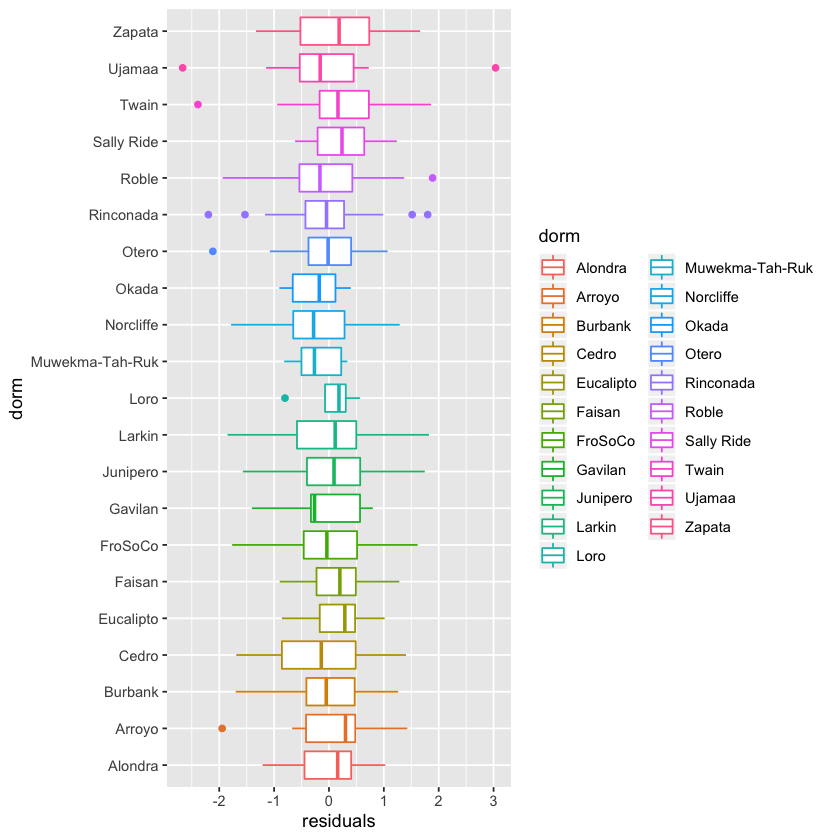

In [29]:
ggplot(data=df, mapping=aes(dorm, residuals)) + 
  geom_boxplot(aes(color=dorm)) + coord_flip()

## Add random effect for dorm, see if significant variance is attributable to dorm membership

In [30]:
mixed_model_ls = lmer(as.formula(paste('life_satisfaction_t2 ~', fixed_params, "+ (1|dorm)")), df)
summary(mixed_model_ls)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
as.formula(paste("life_satisfaction_t2 ~", fixed_params, "+ (1|dorm)"))
   Data: df

REML criterion at convergence: 1099.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3519 -0.5687  0.0728  0.6127  3.8172 

Random effects:
 Groups   Name        Variance Std.Dev.
 dorm     (Intercept) 0.0000   0.0000  
 Residual             0.6327   0.7954  
Number of obs: 436, groups:  dorm, 21

Fixed effects:
                                             Estimate Std. Error         df
(Intercept)                                 6.524e-01  8.254e-01  4.100e+02
life_satisfaction_t1                        6.738e-01  4.349e-02  4.100e+02
loneliness_t1                              -1.211e-01  8.973e-02  4.100e+02
stress_t1                                  -1.958e-01  9.430e-02  4.100e+02
edges_in                                    3.345e-02  1.494e-02  4.100e+02
edges_out                       

### Try again, with some dorm-level covariates

In [31]:
mixed_model_ls_with_l2_covariates = lmer(as.formula(paste(
    'life_satisfaction_t2 ~', fixed_params,
    "+ (1 + BFI_E + life_satisfaction_t1|dorm)")),
    df)
summary(mixed_model_ls_with_l2_covariates)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
as.formula(paste("life_satisfaction_t2 ~", fixed_params, "+ (1 + BFI_E + life_satisfaction_t1|dorm)"))
   Data: df

REML criterion at convergence: 1099.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3519 -0.5687  0.0728  0.6127  3.8172 

Random effects:
 Groups   Name                 Variance  Std.Dev.  Corr       
 dorm     (Intercept)          5.573e-06 2.361e-03            
          BFI_E                8.688e-09 9.321e-05  1.00      
          life_satisfaction_t1 3.161e-07 5.622e-04 -1.00 -1.00
 Residual                      6.327e-01 7.954e-01            
Number of obs: 436, groups:  dorm, 21

Fixed effects:
                                             Estimate Std. Error         df
(Intercept)                                 6.524e-01  8.254e-01  4.100e+02
life_satisfaction_t1                        6.738e-01  4.349e-02  4.066e+02
loneliness_t1                     

In [32]:
anova(mixed_model_ls, mixed_model_ls_with_l2_covariates, refit=FALSE)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model_ls,28,1155.668,1269.842,-549.8338,1099.668,NA,NA,NA
mixed_model_ls_with_l2_covariates,33,1165.668,1300.230,-549.8338,1099.668,0,5,1


## Add fixed effects for network (traits of people connected to the individual via nominations)

In [33]:
network_model_ls = lm(paste("life_satisfaction_t2 ~ ", fixed_params, "
                            network_life_satisfaction_t1 + network_loneliness_t1 + network_stress_t1 +
                            network_empathy +
                            network_BFI_E + network_BFI_O + network_BFI_C + network_BFI_A + network_BFI_N +
                            network_intl_student + log10(network_family_income)"),
                          df)
summary(network_model_ls)


Call:
lm(formula = paste("life_satisfaction_t2 ~ ", fixed_params, "\n                            network_life_satisfaction_t1 + network_loneliness_t1 + network_stress_t1 +\n                            network_empathy +\n                            network_BFI_E + network_BFI_O + network_BFI_C + network_BFI_A + network_BFI_N +\n                            network_intl_student + log10(network_family_income)"), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.66626 -0.45237  0.05788  0.48735  3.03635 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 0.6523883  0.8253581   0.790
life_satisfaction_t1                        0.6738174  0.0434915  15.493
loneliness_t1                              -0.1211143  0.0897296  -1.350
stress_t1                                  -0.1958093  0.0942955  -2.077
edges_in                                    0.0334477  0.0149433   2.238
edges_out     

In [34]:
anova(fixed_model_ls_inout, network_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,430,271.6045,NA,NA,NA,NA
2,410,259.4210,20,12.18347,0.962764,0.5071523


In [35]:
r1 = summary(fixed_model_ls_inout)$adj.r.squared
r2 = summary(network_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.57091495123464"
[1] "After: 0.570170526066295"
[1] "Partial r² (adjusted): -0.00173491285815388"


In [36]:
network_model_ls = lm(life_satisfaction_t2 ~ life_satisfaction_t1 +
                          loneliness_t1 + stress_t1 + edges_in + edges_out +
                            log10(family_income) + log10(network_family_income),
                          df)
summary(network_model_ls)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + 
    stress_t1 + edges_in + edges_out + log10(family_income) + 
    log10(network_family_income), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.74024 -0.46154  0.05121  0.51252  2.99875 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -0.600849   0.917618  -0.655  0.51295    
life_satisfaction_t1          0.683015   0.040360  16.923  < 2e-16 ***
loneliness_t1                -0.108179   0.082523  -1.311  0.19059    
stress_t1                    -0.224762   0.077463  -2.902  0.00391 ** 
edges_in                      0.031536   0.013962   2.259  0.02441 *  
edges_out                     0.017523   0.009398   1.865  0.06292 .  
log10(family_income)          0.155753   0.105974   1.470  0.14237    
log10(network_family_income)  0.324111   0.175485   1.847  0.06544 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

In [37]:
anova(base_model_ls_only, network_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,434,286.9732,NA,NA,NA,NA
2,428,266.5541,6,20.41919,5.464439,1.831706e-05


In [38]:
r1 = summary(base_model_ls_only)$adj.r.squared
r2 = summary(network_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.550813667293909"
[1] "After: 0.576925950512005"
[1] "Partial r² (adjusted): 0.0581324081273446"
